In [214]:
# Tomar una imagen RGB y convertirla a HSL y HSV
#se importan las librerias
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

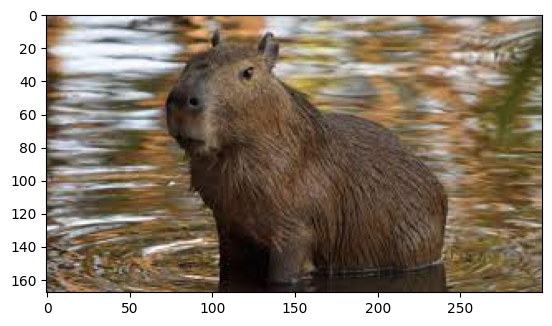

In [215]:
# Se abre la imagen y se obtiene la matriz
img = Image.open("capi.jpg")
matriz = np.array(img)
ancho, alto = img.size

# Se separa la imagen en los canales RGB
r, g, b = img.split()

# Se obtienen las matrices de los canales de color
matriz_rojo = np.array(r)
matriz_verde = np.array(g)
matriz_azul = np.array(b)

plt.imshow(img)

In [216]:
# obtener el maximo y minimo de los pixeles de la imagen
def maximo(x, y):
    r, g, b = img.getpixel((x, y))
    return max(r, g, b)

def minimo(x, y):
    r, g, b = img.getpixel((x, y))
    return min(r, g, b)


In [217]:
# determinar el valor de H
def valorH(x, y, maximo, minimo):
    r, g, b = img.getpixel((x, y))

    H = 0
    if(maximo-minimo != 0):
     if r == maximo:
          H = (g - b) * 60 / (maximo - minimo)
     elif g == maximo:
          H = (b - r) * 60 / (maximo - minimo)+120
     elif b == maximo:
          H = (r - g) * 60 / (maximo - minimo)+240
    
    return int(H)      

In [218]:
fotoHLS = img.copy()
fotoHSV = img.copy()

for x in range(ancho):
    for y in range(alto):
        maxi = maximo(x, y)
        mini = minimo(x, y)
        h = valorH(x, y, maxi, mini)

        if(maxi != 0):
          s1 = (maxi - mini) / maxi
          v = maxi
          l = (maxi + mini) / 2
          s2 = maxi - mini
     
          fotoHSV.putpixel((x, y), (int(h), int(s1), int(v)))
          fotoHLS.putpixel((x, y), (int(h),int(l), int(s2)))


hs,ss, vs = fotoHSV.split()

hl, ll, sl = fotoHLS.split()

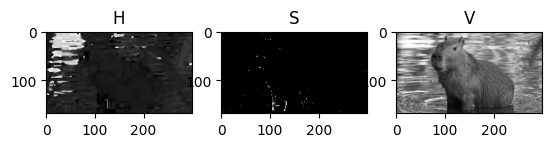

In [219]:
# Se muestran los canales de la imagen HSV
plt.subplot(1, 3, 1)
plt.imshow(hs, cmap="gray")
plt.title("H")

plt.subplot(1, 3, 2)
plt.imshow(ss, cmap="gray")
plt.title("S")

plt.subplot(1, 3, 3)
plt.imshow(vs, cmap="gray")
plt.title("V")

plt.show()


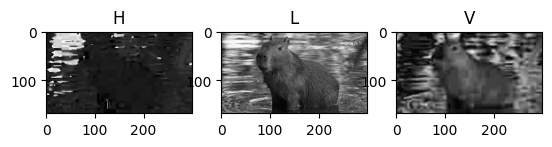

In [220]:
# Se muestran los canales de la imagen HLS
plt.subplot(1, 3, 1)
plt.imshow(hl, cmap="gray")
plt.title("H")

plt.subplot(1, 3, 2)
plt.imshow(ll, cmap="gray")
plt.title("L")

plt.subplot(1, 3, 3)
plt.imshow(sl, cmap="gray")
plt.title("V")

plt.show()